In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandahouse as ph
import datetime
from datetime import timedelta
from operator import attrgetter
%matplotlib inline

### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

Для операций будем использовать объединенный датасет.
Покупкой будет являться оплаченный счет и подтвержденная доставка заказа.
Одной покупкой будет являться один чек.

In [40]:
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [41]:
# Создаем таблицу с группировкой по месяцам и пользователям и считаем для каждого количество покупок 
order_id_to_month = all_df.loc[all_df.order_approved_at.notna()] \
                          .query('order_status == "delivered"') \
                          .groupby([pd.Grouper(key="order_purchase_timestamp", freq="M"), 'customer_unique_id']) \
                          .agg({'order_id': 'count'}) \
                          .rename(columns={'order_id': 'order_count'}) \
                          .reset_index()

In [42]:
# Добавим колонку с количеством недель в каждом месяце
order_id_to_month['week_in_month'] = order_id_to_month.order_purchase_timestamp.dt.daysinmonth / 7

In [43]:
# Добавляим колонку среднего значения количества покупок в неделю
order_id_to_month['mean_in_week'] = order_id_to_month.order_count / order_id_to_month.week_in_month

In [44]:
# Итоговая таблица
order_id_to_month

,order_purchase_timestamp,customer_unique_id,order_count,week_in_month,mean_in_week
0,2016-09-30,830d5b7aaa3b6f1e9ad63703bec97d23,3,4.285714,0.700000
1,2016-10-31,0032c76b20340da25249092a268ce66c,1,4.428571,0.225806
2,2016-10-31,01f156677184504063bd19739f924af1,1,4.428571,0.225806
3,2016-10-31,0636d30c77f0f9cfad81f1c9b58c791f,1,4.428571,0.225806
4,2016-10-31,06bdfbbe1857c3c925ec81abfb1c9666,1,4.428571,0.225806
...,...,...,...,...,...
95175,2018-08-31,ffc39051848c3ef2be36d1513aa3ad17,1,4.428571,0.225806
95176,2018-08-31,ffc4e1cd8aa220763480d0a18157c45d,1,4.428571,0.225806
95177,2018-08-31,ffe204b1bb8026741b839085b2fd10f2,1,4.428571,0.225806
95178,2018-08-31,ffec490ab531184a483efe2eedd68908,1,4.428571,0.225806


In [45]:
# Найдем топ 3 покупателей с наибольшим количеством покупок

top_3_customers = order_id_to_month.groupby('customer_unique_id', as_index=False) \
                                   .agg({'order_purchase_timestamp':'count'}) \
                                   .sort_values(by='order_purchase_timestamp', ascending=False) \
                                   .rename(columns={'order_purchase_timestamp':'count'}) \
                                   .head(3)
top_3_customers

,customer_unique_id,count
51426,8d50f5eadf50201ccdcedfb9e2ac8455,9
87873,f0e310a6839dce9de1638e0fe5ab282a,6
73911,ca77025e7201e3b30c44b472ff346268,6


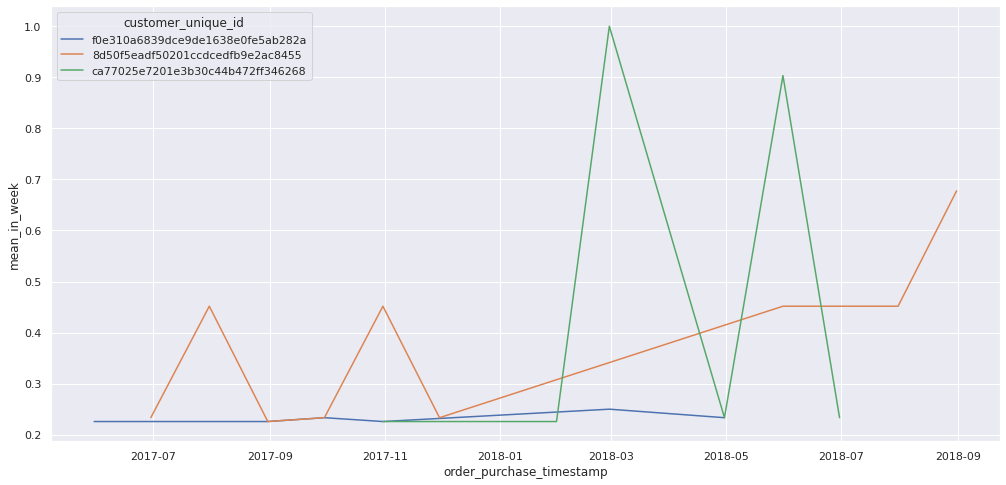

In [46]:
# График распределения среднего значения в неделю по месяцам для трех пользователей с максимальным количеством покупок
sns.set(rc={'figure.figsize': (17, 8)})
sns.lineplot(x='order_purchase_timestamp', y='mean_in_week', data=order_id_to_month.query('customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455" or \
                                                                                           customer_unique_id == "f0e310a6839dce9de1638e0fe5ab282a" or \
                                                                                           customer_unique_id == "ca77025e7201e3b30c44b472ff346268"'), \
                                                                                           hue = 'customer_unique_id')